#Importing Libraries

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


import cv2
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img, img_to_array
#from keras.preprocessing.image import load_img,
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
!unzip /content/images.zip

Streaming output truncated to the last 5000 lines.
 extracting: images/validation/fear/9040.jpg  
 extracting: images/validation/fear/9101.jpg  
 extracting: images/validation/fear/911.jpg  
 extracting: images/validation/fear/9179.jpg  
 extracting: images/validation/fear/9205.jpg  
 extracting: images/validation/fear/9232.jpg  
 extracting: images/validation/fear/9251.jpg  
 extracting: images/validation/fear/9261.jpg  
 extracting: images/validation/fear/9281.jpg  
 extracting: images/validation/fear/9302.jpg  
 extracting: images/validation/fear/9333.jpg  
 extracting: images/validation/fear/9369.jpg  
 extracting: images/validation/fear/9370.jpg  
 extracting: images/validation/fear/9474.jpg  
 extracting: images/validation/fear/949.jpg  
 extracting: images/validation/fear/9602.jpg  
 extracting: images/validation/fear/9606.jpg  
 extracting: images/validation/fear/9842.jpg  
 extracting: images/validation/fear/9898.jpg  
   creating: images/validation/happy/
 extracting: images/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=da60495341098edc6983cf4cd643f704b8ec1ebfde30f4a3a02dfa916a628a5d
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=dd0e417c044fb777b0a14e4b9b72025be6c1e95b2bf75c55211a847ff0c96b4e
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=ae256556590865f1747a8cd1cf28efcd4e8886c06d203acbc18677a5ea9d84e6
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


#Importing Dataset

In [ ]:
picture_size = 48
folder_path = '/content/images'

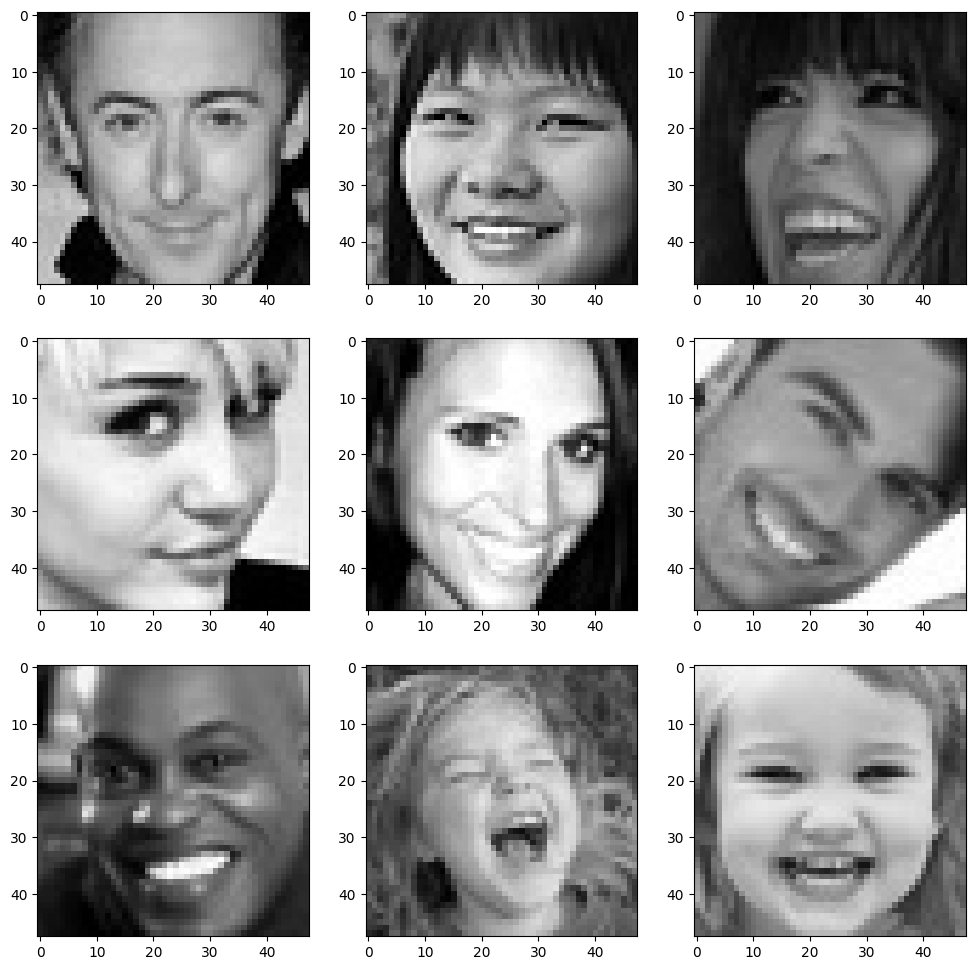

In [ ]:
expression = 'happy'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

#Train-Test Split

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"/validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


#Categorization of Images

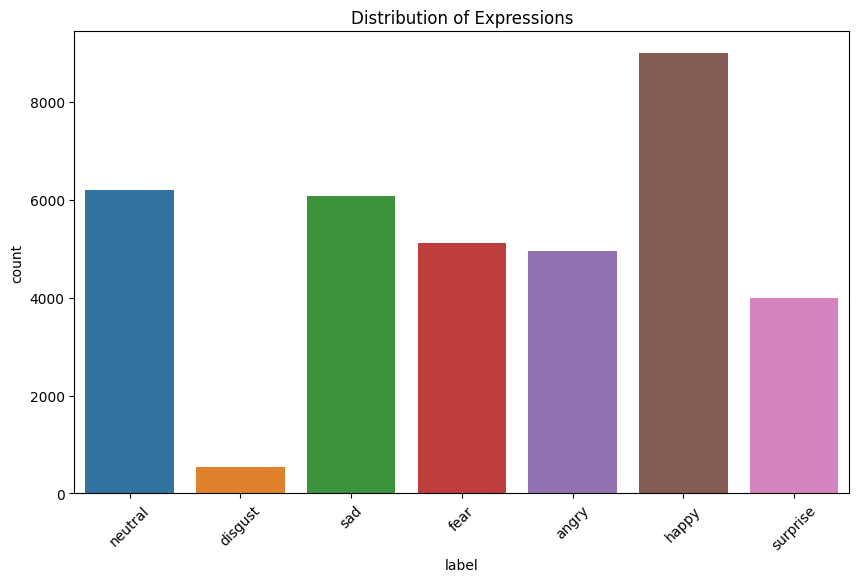

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array

# Function to load images from a specific directory
def load_images_from_directory(directory, picture_size=48):
    images = []
    labels = []

    for expression in os.listdir(directory):
        expression_path = os.path.join(directory, expression)
        if os.path.isdir(expression_path):
            for image_file in os.listdir(expression_path):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                    img_path = os.path.join(expression_path, image_file)
                    try:
                        img = load_img(img_path, target_size=(picture_size, picture_size), color_mode="grayscale")
                        img_array = img_to_array(img)
                        flat_img_array = img_array.flatten()
                        images.append(flat_img_array)
                        labels.append(expression)
                    except Exception as e:
                        print(f"Error loading image: {img_path}. Error: {e}")

    return np.array(images), np.array(labels)

# Function to load images from both train and validation directories
def load_dataset(folder_path, picture_size=48):
    train_images, train_labels = load_images_from_directory(os.path.join(folder_path, 'train'), picture_size)
    validation_images, validation_labels = load_images_from_directory(os.path.join(folder_path, 'validation'), picture_size)

    return np.concatenate((train_images, validation_images)), np.concatenate((train_labels, validation_labels))

# Load images
folder_path = "/content/images"  # Example: "../input/face-expression-recognition-dataset/images/"
images, labels = load_dataset(folder_path)

# Check if images and labels are loaded
if len(images) > 0 and len(labels) > 0:
    # Creating DataFrame
    image_df = pd.DataFrame(images)
    image_df['label'] = labels

    # Visualizing the distribution of different expressions
    plt.figure(figsize=(10, 6))
    sns.countplot(x='label', data=image_df)
    plt.title("Distribution of Expressions")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No images or labels were loaded. Check the file paths and directory structure.")

#Data Visualization Method - TSNE

Cumulative explained variation for 50 principal components: 0.8438097238540649
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 35887 samples in 0.003s...
[t-SNE] Computed neighbors for 35887 samples in 11.849s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35887
[t-SNE] Computed conditional probabilities for sample 2000 / 35887
[t-SNE] Computed conditional probabilities for sample 3000 / 35887
[t-SNE] Computed conditional probabilities for sample 4000 / 35887
[t-SNE] Computed conditional probabilities for sample 5000 / 35887
[t-SNE] Computed conditional probabilities for sample 6000 / 35887
[t-SNE] Computed conditional probabilities for sample 7000 / 35887
[t-SNE] Computed conditional probabilities for sample 8000 / 35887
[t-SNE] Computed conditional probabilities for sample 9000 / 35887
[t-SNE] Computed conditional probabilities for sample 10000 / 35887
[t-SNE] Computed conditional probabilities for sample 11000 / 35887
[t-SNE] Computed conditional probabil

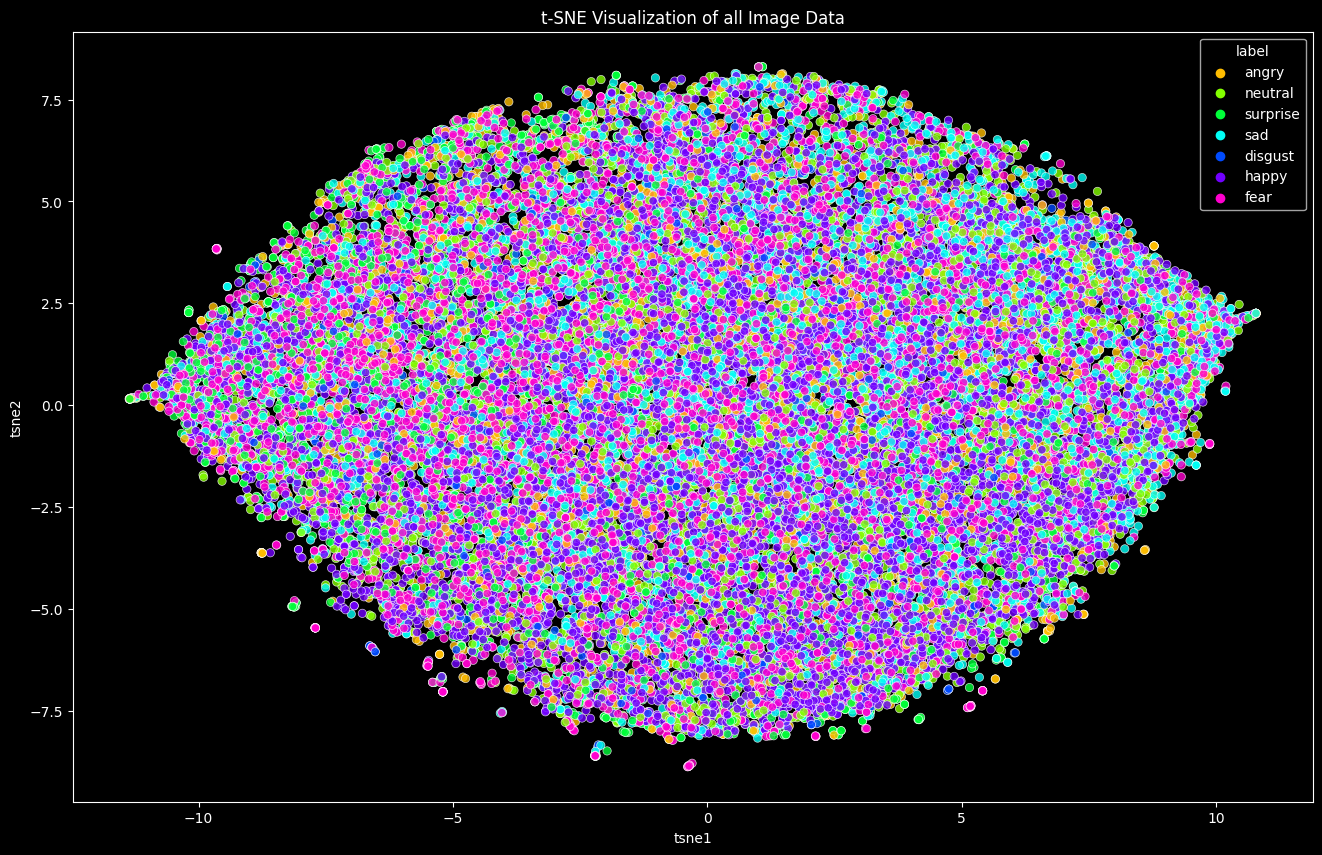

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'images' is your array of flattened images and 'labels' is the array of corresponding expressions

# We will use PCA to reduce the dimensionality before t-SNE for better performance
pca = PCA(n_components=50)  # Take the first 50 principal components
pca_result = pca.fit_transform(images)
print(f'Cumulative explained variation for 50 principal components: {np.sum(pca.explained_variance_ratio_)}')

# Now perform t-SNE on the PCA-reduced data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['label'] = labels  # make sure labels is a list/array of expression labels for all images

# Plot the t-SNE results with labels for hue
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="label",
    palette=sns.color_palette("hsv", len(set(labels))),
    data=tsne_df,
    legend="full",
    alpha=0.8
)

plt.title('t-SNE Visualization of all Image Data')
plt.show()

Cumulative explained variation for 50 principal components: 0.8438193202018738
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 35887 samples in 0.003s...
[t-SNE] Computed neighbors for 35887 samples in 10.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35887
[t-SNE] Computed conditional probabilities for sample 2000 / 35887
[t-SNE] Computed conditional probabilities for sample 3000 / 35887
[t-SNE] Computed conditional probabilities for sample 4000 / 35887
[t-SNE] Computed conditional probabilities for sample 5000 / 35887
[t-SNE] Computed conditional probabilities for sample 6000 / 35887
[t-SNE] Computed conditional probabilities for sample 7000 / 35887
[t-SNE] Computed conditional probabilities for sample 8000 / 35887
[t-SNE] Computed conditional probabilities for sample 9000 / 35887
[t-SNE] Computed conditional probabilities for sample 10000 / 35887
[t-SNE] Computed conditional probabilities for sample 11000 / 35887
[t-SNE] Computed conditional probabil

<ipython-input-41-b6a716d8b430>:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(tsne_df.loc[indices, 'tsne1'], tsne_df.loc[indices, 'tsne2'], tsne_df.loc[indices, 'tsne3'],


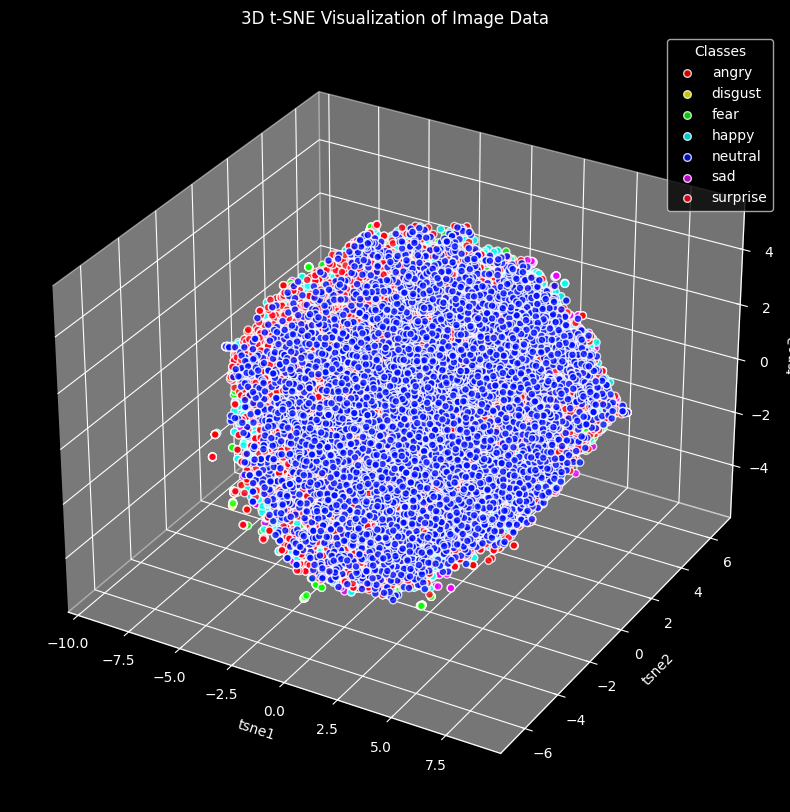

In [ ]:
plt.style.use('dark_background')
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'images' is your array of flattened images and 'labels' is the array of corresponding expressions

# We will use PCA to reduce the dimensionality before t-SNE for better performance
pca = PCA(n_components=50)  # Take the first 50 principal components
pca_result = pca.fit_transform(images)
print(f'Cumulative explained variation for 50 principal components: {np.sum(pca.explained_variance_ratio_)}')

# Now perform t-SNE on the PCA-reduced data
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)  # Use n_components=3 for 3D
tsne_results = tsne.fit_transform(pca_result)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
tsne_df['label'] = labels  # make sure labels is a list/array of expression labels for all images

# Create a figure and a 3D Axes
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Color map
unique_labels = np.unique(labels)
colors = plt.cm.hsv(np.linspace(0, 1, len(unique_labels)))

# Plot each label as a separate scatter plot
for label, col in zip(unique_labels, colors):
    indices = tsne_df['label'] == label
    ax.scatter(tsne_df.loc[indices, 'tsne1'], tsne_df.loc[indices, 'tsne2'], tsne_df.loc[indices, 'tsne3'],
               c=col, label=label, alpha=0.8, edgecolors='w', s=30)

# Add labels and title
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_zlabel('tsne3')
plt.title('3D t-SNE Visualization of Image Data')

# Legend
ax.legend(title='Classes')

plt.show()


#Data Visualization Method - PCA

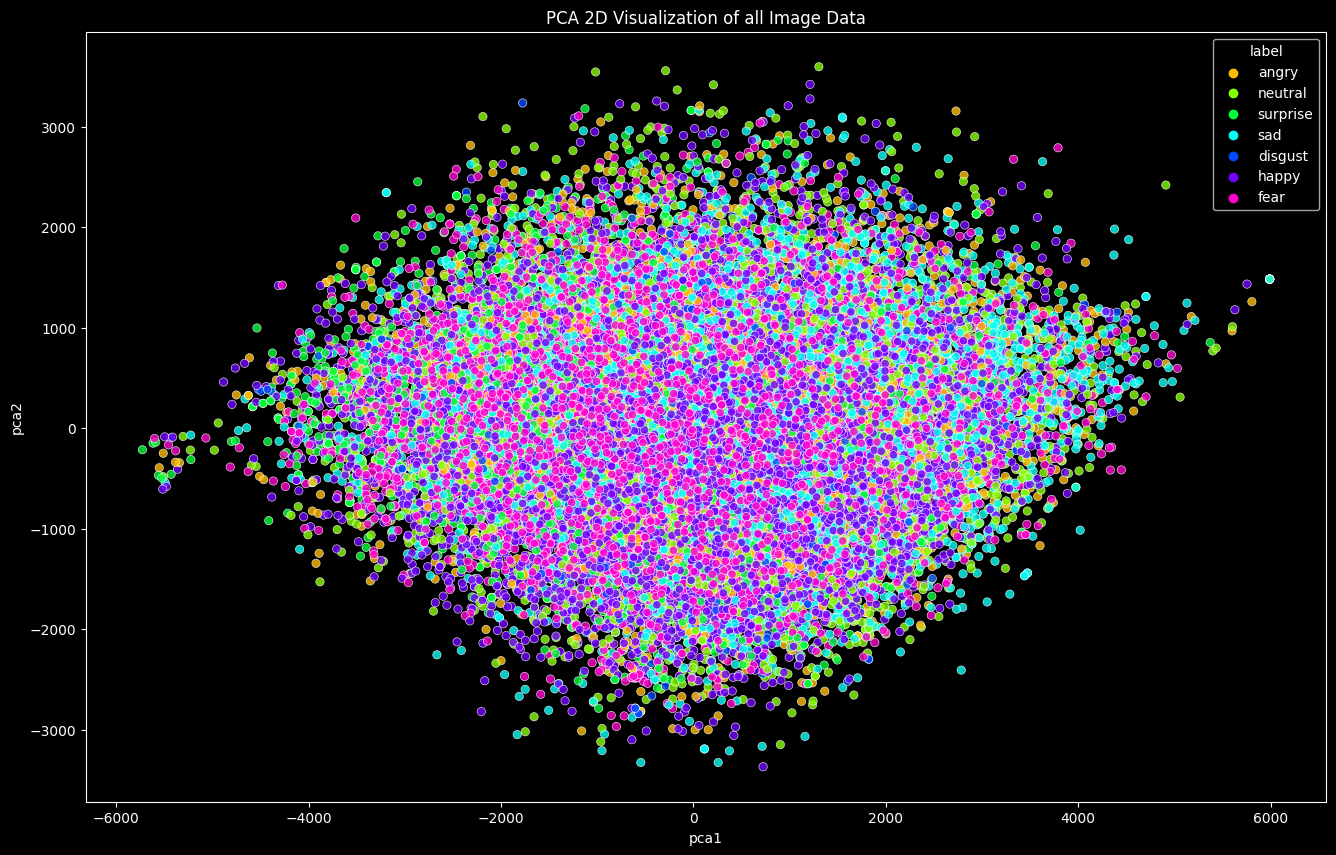

In [ ]:
# We already have the PCA results in pca_result, we'll just use the first two components
pca_df = pd.DataFrame(pca_result[:, :2], columns=['pca1', 'pca2'])
pca_df['label'] = labels  # Ensure this is the array of expression labels

# Plot the PCA results
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",
    hue="label",
    palette=sns.color_palette("hsv", len(np.unique(labels))),
    data=pca_df,
    legend="full",
    alpha=0.8
)
plt.title('PCA 2D Visualization of all Image Data')
plt.show()

Cumulative explained variation for 3 principal components: 0.4811294674873352


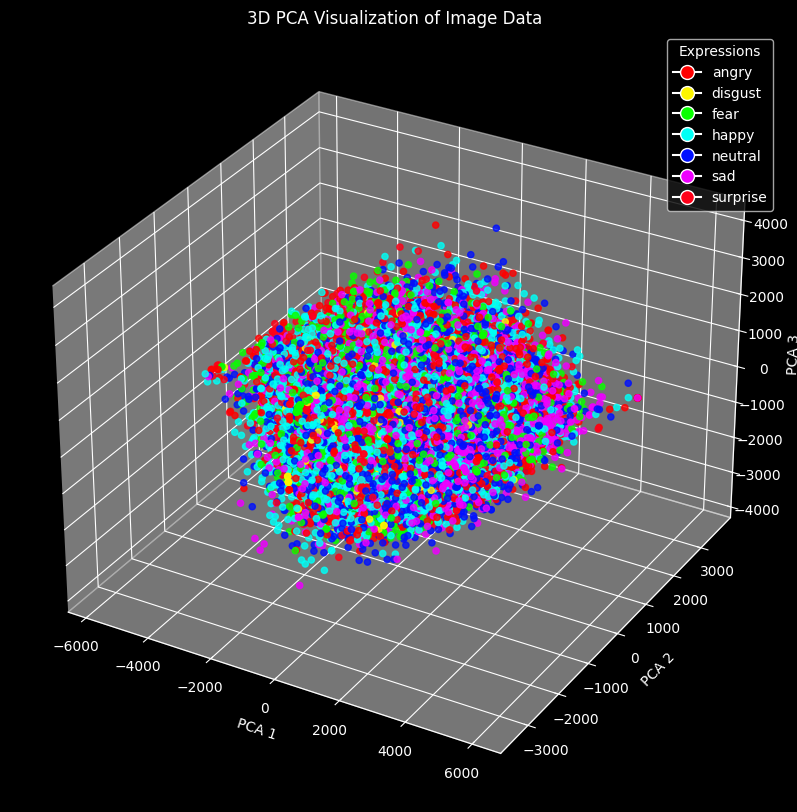

In [ ]:
plt.style.use('dark_background')

from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result_3d = pca.fit_transform(images)  # Assuming 'images' is your array of flattened images

# Explained variance can help understand how much information is compressed into the components
print(f'Cumulative explained variation for 3 principal components: {np.sum(pca.explained_variance_ratio_)}')

# Create a DataFrame for the PCA results with 3 components
pca_df_3d = pd.DataFrame(pca_result_3d, columns=['pca1', 'pca2', 'pca3'])
pca_df_3d['label'] = labels  # Ensure this is the array of expression labels

# Create a figure for 3D plotting
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3 PCA components
scatter = ax.scatter(
    pca_df_3d['pca1'], pca_df_3d['pca2'], pca_df_3d['pca3'],
    c=pd.Categorical(pca_df_3d['label']).codes,  # Encode labels with numbers for color mapping
    cmap='hsv',  # Colormap used for different labels
    alpha=0.8
)

# Create a legend with the unique labels
unique_labels = np.unique(labels)
# Create a color map from the unique labels
color_map = {label: color for label, color in zip(unique_labels, scatter.cmap(np.linspace(0, 1, len(unique_labels))))}
# Create custom legend entries
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=color_map[label], markersize=10)
                   for label in unique_labels]
# Add the custom legend
ax.legend(handles=legend_elements, title='Expressions')

# Set labels for axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Set title
plt.title('3D PCA Visualization of Image Data')

# Show plot
plt.show()


#Data Visualization Method - UMAP

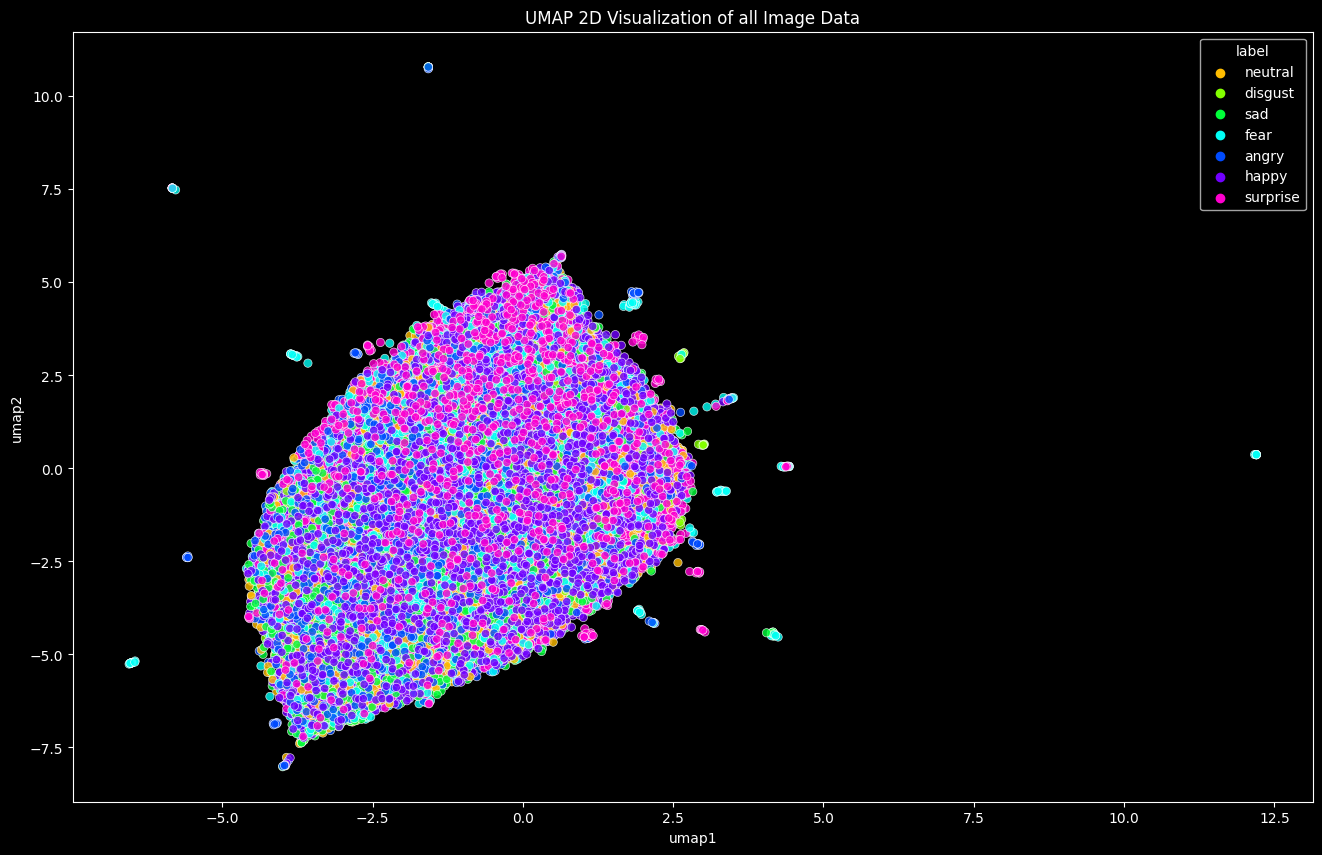

In [ ]:
plt.style.use('dark_background')

import umap.umap_ as umap
from umap.umap_ import UMAP


# We will use the scaled images as input for UMAP
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

# Perform UMAP
umap_model = UMAP(n_components=2, n_neighbors=50, min_dist=0.3, metric='euclidean')
umap_results = umap_model.fit_transform(images_scaled)

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['umap1', 'umap2'])
umap_df['label'] = labels  # Ensure this is the array of expression labels

# Plot the UMAP results with labels for hue
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap1", y="umap2",
    hue="label",
    palette=sns.color_palette("hsv", len(np.unique(labels))),
    data=umap_df,
    legend="full",
    alpha=0.8
)
plt.title('UMAP 2D Visualization of all Image Data')
plt.show()

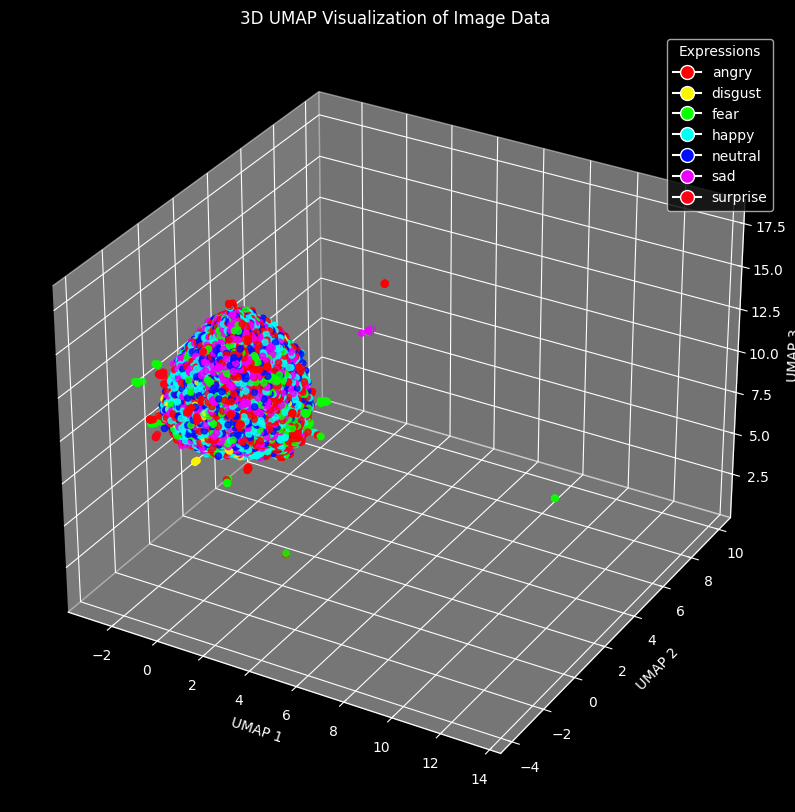

In [ ]:
import umap.umap_ as umap
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'images' is your array of flattened images and 'labels' is the array of corresponding expressions

# We will use the scaled images as input for UMAP
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

# Perform UMAP with 3 components for 3D visualization
umap_model = UMAP(n_components=3, n_neighbors=50, min_dist=0.3, metric='euclidean')
umap_results_3d = umap_model.fit_transform(images_scaled)

# Create a DataFrame for the UMAP results with 3 components
umap_df_3d = pd.DataFrame(umap_results_3d, columns=['umap1', 'umap2', 'umap3'])
umap_df_3d['label'] = labels  # Ensure this is the array of expression labels

# Create a figure for 3D plotting
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot for UMAP results
scatter = ax.scatter(
    umap_df_3d['umap1'], umap_df_3d['umap2'], umap_df_3d['umap3'],
    c=pd.Categorical(umap_df_3d['label']).codes,  # Encode labels with numbers for color mapping
    cmap='hsv',  # Colormap used for different labels
    alpha=0.8
)

# Create a legend with the unique labels
unique_labels = np.unique(labels)
# Create a color map from the unique labels
color_map = {label: color for label, color in zip(unique_labels, scatter.cmap(np.linspace(0, 1, len(unique_labels))))}
# Create custom legend entries
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=color_map[label], markersize=10)
                   for label in unique_labels]
# Add the custom legend
ax.legend(handles=legend_elements, title='Expressions')

# Set labels for axes
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')

# Set title
plt.title('3D UMAP Visualization of Image Data')

# Show plot
plt.show()


#Experiment 1 - CNN

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 128)       2

In [ ]:


checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')


callbacks_list = [checkpoint]



epochs = 48

history = model.fit_generator(
    generator=train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)


<ipython-input-8-d1511a01a41d>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.7799 - accuracy: 0.3200

225/225 [==============================] - 33s 77ms/step - loss: 1.7799 - accuracy: 0.3200 - val_loss: 1.7843 - val_accuracy: 0.3351
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4421 - accuracy: 0.4487

225/225 [==============================] - 16s 72ms/step - loss: 1.4421 - accuracy: 0.4487 - val_loss: 1.4105 - val_accuracy: 0.4497
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.2831 - accuracy: 0.5086

225/225 [==============================] - 16s 72ms/step - loss: 1.2831 - accuracy: 0.5086 - val_loss: 1.2931 - val_accuracy: 0.5055
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.1993 - accuracy: 0.5433

225/225 [==============================] - 16s 73ms/step - loss: 1.1993 - accuracy: 0.5433 - val_loss: 1.2316 - val_accuracy: 0.5391
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.1317 - accuracy: 0.5669

225/225 [==============================] - 16s 72ms/step - loss: 1.1317 - accuracy: 0.5669 - val_loss: 1.2049 - val_accuracy: 0.5429
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.0788 - accuracy: 0.5910

225/225 [==============================] - 17s 77ms/step - loss: 1.0788 - accuracy: 0.5910 - val_loss: 1.3901 - val_accuracy: 0.4920
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.0347 - accuracy: 0.6100

225/225 [==============================] - 20s 88ms/step - loss: 1.0347 - accuracy: 0.6100 - val_loss: 1.2210 - val_accuracy: 0.5399
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 0.9906 - accuracy: 0.6259

225/225 [==============================] - 17s 74ms/step - loss: 0.9906 - accuracy: 0.6259 - val_loss: 1.1844 - val_accuracy: 0.5724
Epoch 9/48
225/225 [==============================] - ETA: 0s - loss: 0.9444 - accuracy: 0.6439

225/225 [==============================] - 17s 75ms/step - loss: 0.9444 - accuracy: 0.6439 - val_loss: 1.2357 - val_accuracy: 0.5432
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 0.9061 - accuracy: 0.6565

225/225 [==============================] - 16s 73ms/step - loss: 0.9061 - accuracy: 0.6565 - val_loss: 1.1988 - val_accuracy: 0.5602
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 0.8680 - accuracy: 0.6738

225/225 [==============================] - 16s 73ms/step - loss: 0.8680 - accuracy: 0.6738 - val_loss: 1.2196 - val_accuracy: 0.5335
Epoch 12/48
225/225 [==============================] - ETA: 0s - loss: 0.8210 - accuracy: 0.6933

225/225 [==============================] - 16s 73ms/step - loss: 0.8210 - accuracy: 0.6933 - val_loss: 1.2853 - val_accuracy: 0.5224
Epoch 13/48
225/225 [==============================] - ETA: 0s - loss: 0.7762 - accuracy: 0.7084

225/225 [==============================] - 17s 74ms/step - loss: 0.7762 - accuracy: 0.7084 - val_loss: 1.1428 - val_accuracy: 0.5911
Epoch 14/48
225/225 [==============================] - ETA: 0s - loss: 0.7304 - accuracy: 0.7241

225/225 [==============================] - 16s 73ms/step - loss: 0.7304 - accuracy: 0.7241 - val_loss: 1.0675 - val_accuracy: 0.6206
Epoch 15/48
225/225 [==============================] - ETA: 0s - loss: 0.6777 - accuracy: 0.7448

225/225 [==============================] - 16s 73ms/step - loss: 0.6777 - accuracy: 0.7448 - val_loss: 1.1307 - val_accuracy: 0.6121
Epoch 16/48
225/225 [==============================] - ETA: 0s - loss: 0.6561 - accuracy: 0.7536

225/225 [==============================] - 16s 73ms/step - loss: 0.6561 - accuracy: 0.7536 - val_loss: 1.1981 - val_accuracy: 0.5876
Epoch 17/48
225/225 [==============================] - ETA: 0s - loss: 0.6058 - accuracy: 0.7754

225/225 [==============================] - 17s 74ms/step - loss: 0.6058 - accuracy: 0.7754 - val_loss: 1.3578 - val_accuracy: 0.5659
Epoch 18/48
225/225 [==============================] - ETA: 0s - loss: 0.5541 - accuracy: 0.7951

225/225 [==============================] - 16s 73ms/step - loss: 0.5541 - accuracy: 0.7951 - val_loss: 1.1698 - val_accuracy: 0.6107
Epoch 19/48
225/225 [==============================] - ETA: 0s - loss: 0.5297 - accuracy: 0.8037

225/225 [==============================] - 16s 73ms/step - loss: 0.5297 - accuracy: 0.8037 - val_loss: 1.3021 - val_accuracy: 0.5794
Epoch 20/48
225/225 [==============================] - ETA: 0s - loss: 0.4871 - accuracy: 0.8182

225/225 [==============================] - 17s 73ms/step - loss: 0.4871 - accuracy: 0.8182 - val_loss: 1.2058 - val_accuracy: 0.6196
Epoch 21/48
225/225 [==============================] - ETA: 0s - loss: 0.4599 - accuracy: 0.8278

225/225 [==============================] - 16s 73ms/step - loss: 0.4599 - accuracy: 0.8278 - val_loss: 1.4763 - val_accuracy: 0.5750
Epoch 22/48
225/225 [==============================] - ETA: 0s - loss: 0.4183 - accuracy: 0.8478

225/225 [==============================] - 16s 73ms/step - loss: 0.4183 - accuracy: 0.8478 - val_loss: 1.3654 - val_accuracy: 0.6151
Epoch 23/48
225/225 [==============================] - ETA: 0s - loss: 0.3954 - accuracy: 0.8567

225/225 [==============================] - 17s 76ms/step - loss: 0.3954 - accuracy: 0.8567 - val_loss: 1.2686 - val_accuracy: 0.6139
Epoch 24/48
225/225 [==============================] - ETA: 0s - loss: 0.3619 - accuracy: 0.8681

225/225 [==============================] - 16s 73ms/step - loss: 0.3619 - accuracy: 0.8681 - val_loss: 1.3343 - val_accuracy: 0.6105
Epoch 25/48
225/225 [==============================] - ETA: 0s - loss: 0.3519 - accuracy: 0.8716

225/225 [==============================] - 17s 73ms/step - loss: 0.3519 - accuracy: 0.8716 - val_loss: 1.3240 - val_accuracy: 0.6307
Epoch 26/48
225/225 [==============================] - ETA: 0s - loss: 0.3220 - accuracy: 0.8843

225/225 [==============================] - 16s 72ms/step - loss: 0.3220 - accuracy: 0.8843 - val_loss: 1.4948 - val_accuracy: 0.5864
Epoch 27/48
225/225 [==============================] - ETA: 0s - loss: 0.3079 - accuracy: 0.8890

225/225 [==============================] - 17s 75ms/step - loss: 0.3079 - accuracy: 0.8890 - val_loss: 1.7641 - val_accuracy: 0.5871
Epoch 28/48
225/225 [==============================] - ETA: 0s - loss: 0.2913 - accuracy: 0.8943

225/225 [==============================] - 16s 72ms/step - loss: 0.2913 - accuracy: 0.8943 - val_loss: 1.5143 - val_accuracy: 0.6290
Epoch 29/48
225/225 [==============================] - ETA: 0s - loss: 0.2787 - accuracy: 0.9017

225/225 [==============================] - 16s 73ms/step - loss: 0.2787 - accuracy: 0.9017 - val_loss: 1.4151 - val_accuracy: 0.6328
Epoch 30/48
225/225 [==============================] - ETA: 0s - loss: 0.2629 - accuracy: 0.9061

225/225 [==============================] - 16s 73ms/step - loss: 0.2629 - accuracy: 0.9061 - val_loss: 1.6099 - val_accuracy: 0.6088
Epoch 31/48
225/225 [==============================] - ETA: 0s - loss: 0.2445 - accuracy: 0.9116

225/225 [==============================] - 16s 73ms/step - loss: 0.2445 - accuracy: 0.9116 - val_loss: 1.5888 - val_accuracy: 0.6058
Epoch 32/48
225/225 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.9123

225/225 [==============================] - 17s 73ms/step - loss: 0.2423 - accuracy: 0.9123 - val_loss: 1.6066 - val_accuracy: 0.5929
Epoch 33/48
225/225 [==============================] - ETA: 0s - loss: 0.2285 - accuracy: 0.9187

225/225 [==============================] - 17s 74ms/step - loss: 0.2285 - accuracy: 0.9187 - val_loss: 1.6198 - val_accuracy: 0.6051
Epoch 34/48
225/225 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.9207

225/225 [==============================] - 17s 75ms/step - loss: 0.2247 - accuracy: 0.9207 - val_loss: 1.7590 - val_accuracy: 0.5847
Epoch 35/48
225/225 [==============================] - ETA: 0s - loss: 0.2092 - accuracy: 0.9239

225/225 [==============================] - 16s 73ms/step - loss: 0.2092 - accuracy: 0.9239 - val_loss: 1.6290 - val_accuracy: 0.6241
Epoch 36/48
225/225 [==============================] - ETA: 0s - loss: 0.2047 - accuracy: 0.9262

225/225 [==============================] - 17s 73ms/step - loss: 0.2047 - accuracy: 0.9262 - val_loss: 1.5139 - val_accuracy: 0.6376
Epoch 37/48
225/225 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9290

225/225 [==============================] - 17s 77ms/step - loss: 0.1973 - accuracy: 0.9290 - val_loss: 1.7534 - val_accuracy: 0.6004
Epoch 38/48
225/225 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.9333

225/225 [==============================] - 16s 73ms/step - loss: 0.1901 - accuracy: 0.9333 - val_loss: 1.6891 - val_accuracy: 0.6263
Epoch 39/48
225/225 [==============================] - ETA: 0s - loss: 0.1744 - accuracy: 0.9385

225/225 [==============================] - 17s 74ms/step - loss: 0.1744 - accuracy: 0.9385 - val_loss: 2.1026 - val_accuracy: 0.5615
Epoch 40/48
225/225 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.9408

225/225 [==============================] - 17s 76ms/step - loss: 0.1711 - accuracy: 0.9408 - val_loss: 1.6936 - val_accuracy: 0.6135
Epoch 41/48
225/225 [==============================] - ETA: 0s - loss: 0.1725 - accuracy: 0.9387

225/225 [==============================] - 16s 73ms/step - loss: 0.1725 - accuracy: 0.9387 - val_loss: 1.6848 - val_accuracy: 0.6233
Epoch 42/48
225/225 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.9393

225/225 [==============================] - 17s 76ms/step - loss: 0.1711 - accuracy: 0.9393 - val_loss: 1.7672 - val_accuracy: 0.6364
Epoch 43/48
225/225 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 0.9449

225/225 [==============================] - 17s 73ms/step - loss: 0.1546 - accuracy: 0.9449 - val_loss: 1.7126 - val_accuracy: 0.6288
Epoch 44/48
225/225 [==============================] - ETA: 0s - loss: 0.1564 - accuracy: 0.9456

225/225 [==============================] - 16s 73ms/step - loss: 0.1564 - accuracy: 0.9456 - val_loss: 1.8568 - val_accuracy: 0.5999
Epoch 45/48
225/225 [==============================] - ETA: 0s - loss: 0.1485 - accuracy: 0.9479

225/225 [==============================] - 16s 73ms/step - loss: 0.1485 - accuracy: 0.9479 - val_loss: 1.6773 - val_accuracy: 0.6402
Epoch 46/48
225/225 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9503

225/225 [==============================] - 16s 73ms/step - loss: 0.1462 - accuracy: 0.9503 - val_loss: 1.7729 - val_accuracy: 0.6236
Epoch 47/48
225/225 [==============================] - ETA: 0s - loss: 0.1489 - accuracy: 0.9460

225/225 [==============================] - 17s 77ms/step - loss: 0.1489 - accuracy: 0.9460 - val_loss: 1.7928 - val_accuracy: 0.6310
Epoch 48/48
 91/225 [===========>..................] - ETA: 8s - loss: 0.1385 - accuracy: 0.9516

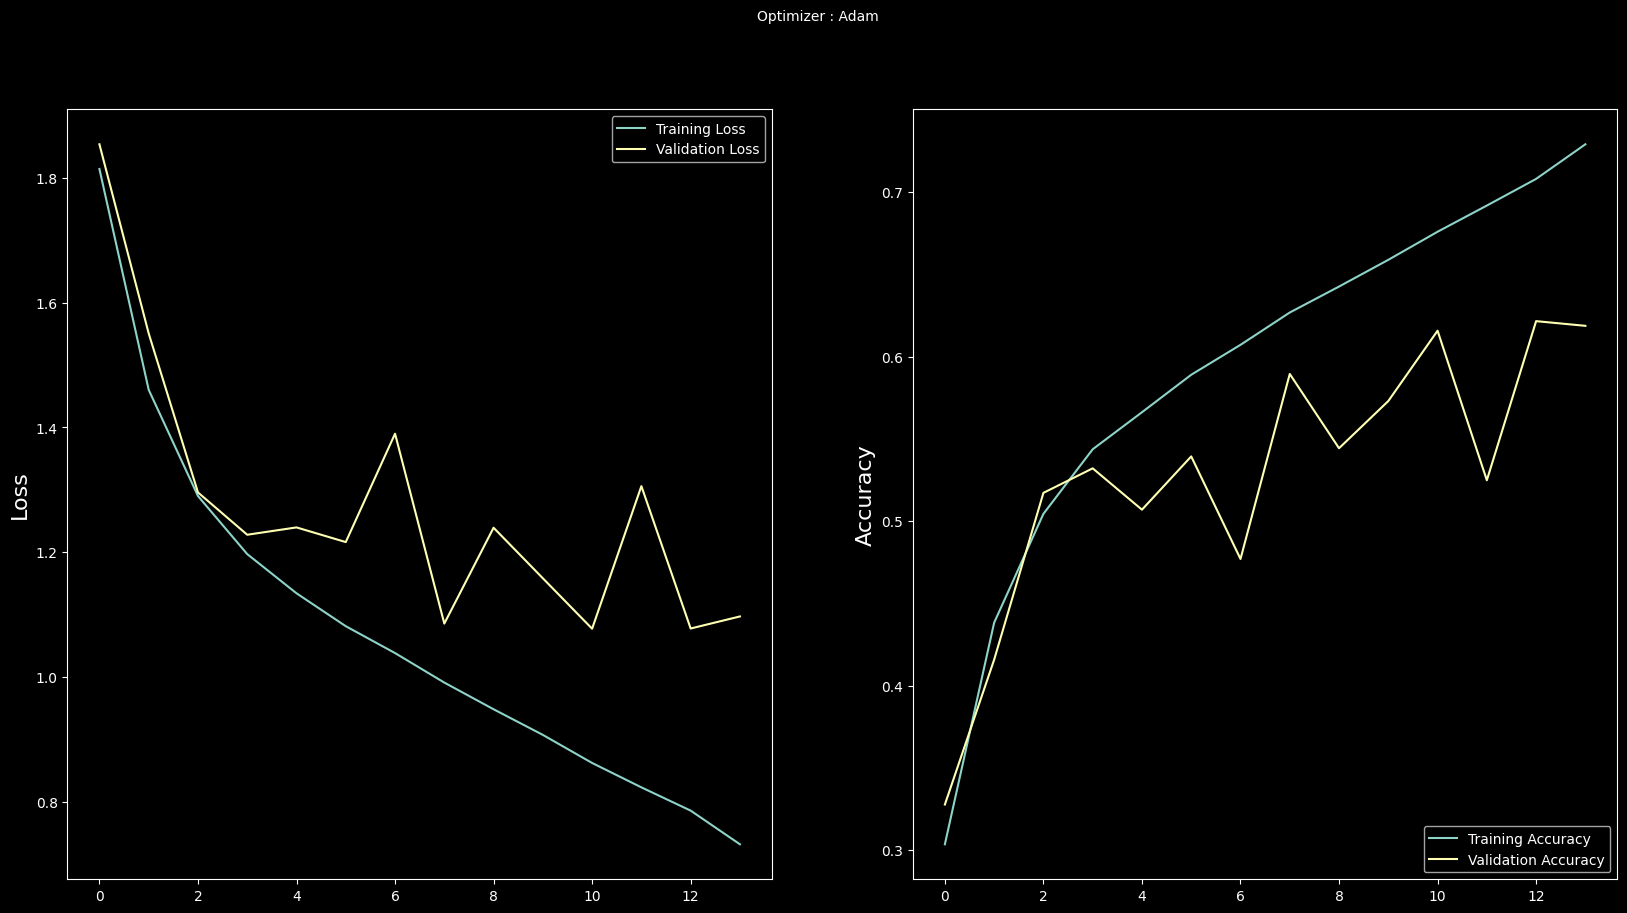

In [ ]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

#Experiment 2 - CNN with Early Stopping


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

callbacks_list = [early_stopping,checkpoint]

epochs = 48

model2 = model

model2.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model2.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-48-1d82397c7c48>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 0.7375 - accuracy: 0.7245

225/225 [==============================] - 21s 77ms/step - loss: 0.7375 - accuracy: 0.7245 - val_loss: 1.0098 - val_accuracy: 0.6453
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 0.6629 - accuracy: 0.7556

225/225 [==============================] - 19s 83ms/step - loss: 0.6629 - accuracy: 0.7556 - val_loss: 1.0264 - val_accuracy: 0.6462
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 0.6069 - accuracy: 0.7761

225/225 [==============================] - 18s 79ms/step - loss: 0.6069 - accuracy: 0.7761 - val_loss: 1.0825 - val_accuracy: 0.6401
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 0.5609 - accuracy: 0.7932Restoring model weights from the end of the best epoch: 1.


225/225 [==============================] - 17s 76ms/step - loss: 0.5609 - accuracy: 0.7932 - val_loss: 1.0565 - val_accuracy: 0.6541
Epoch 4: early stopping


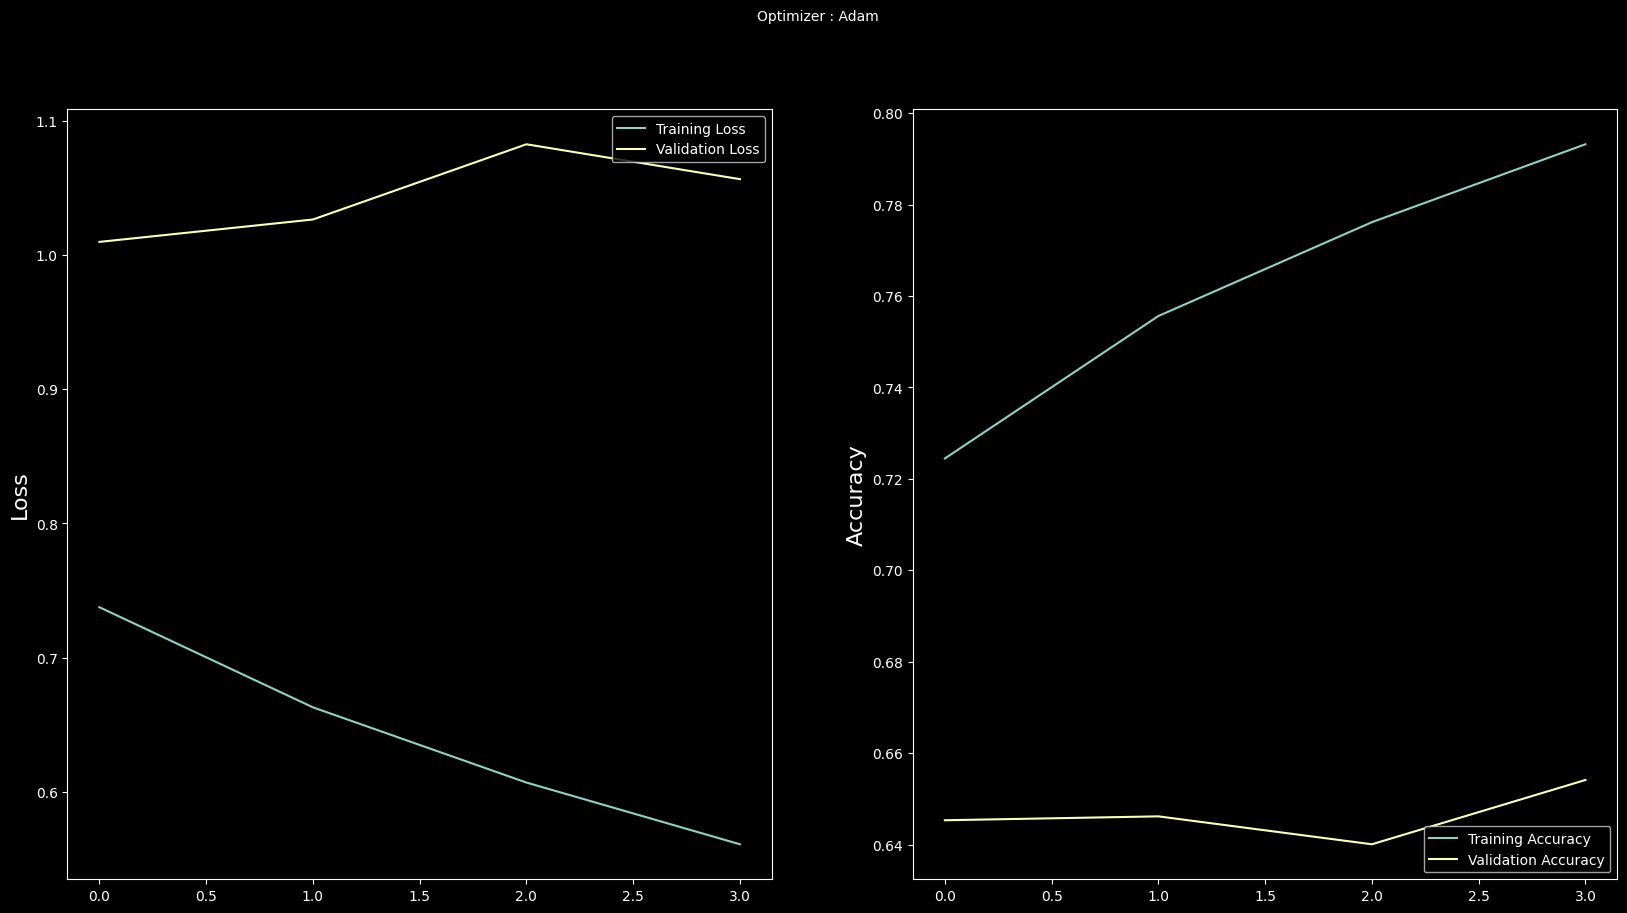

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

#Experiment 3 - Inception Type Model

In [ ]:
from keras.layers import Concatenate, Input

no_of_classes = 7

# Inception-like model with multiple kernel sizes in parallel
input_img = Input(shape=(48,48,1))

tower_1 = Conv2D(32, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(32, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(32, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(32, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(32, (1,1), padding='same', activation='relu')(tower_3)

output = Concatenate(axis=1)([tower_1, tower_2, tower_3])
output = Flatten()(output)
output = Dense(no_of_classes, activation='softmax')(output)

model3 = Model(inputs=input_img, outputs=output)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 48, 48, 32)           64        ['input_3[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 48, 48, 32)           64        ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 48, 48, 1)            0         ['input_3[0][0]']             
 g2D)                                                                                         

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model3.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model3.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


<ipython-input-18-1302b70956e6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(generator=train_set,


225/225 [==============================] - ETA: 0s - loss: 407.1252 - accuracy: 0.1891

225/225 [==============================] - 28s 73ms/step - loss: 407.1252 - accuracy: 0.1891 - val_loss: 228.6668 - val_accuracy: 0.1197 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 93.4654 - accuracy: 0.2225

225/225 [==============================] - 16s 72ms/step - loss: 93.4654 - accuracy: 0.2225 - val_loss: 55.5910 - val_accuracy: 0.2935 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 29.7944 - accuracy: 0.2828

225/225 [==============================] - 14s 61ms/step - loss: 29.7944 - accuracy: 0.2828 - val_loss: 31.8162 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 4/48
224/225 [============================>.] - ETA: 0s - loss: 9.3183 - accuracy: 0.3563

225/225 [==============================] - 14s 63ms/step - loss: 9.3069 - accuracy: 0.3566 - val_loss: 13.9018 - val_accuracy: 0.1798 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 4.0422 - accuracy: 0.4213

225/225 [==============================] - 14s 63ms/step - loss: 4.0422 - accuracy: 0.4213 - val_loss: 4.3487 - val_accuracy: 0.2920 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.9743 - accuracy: 0.4973

225/225 [==============================] - 14s 63ms/step - loss: 1.9743 - accuracy: 0.4973 - val_loss: 3.0416 - val_accuracy: 0.3645 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.3964 - accuracy: 0.5648

225/225 [==============================] - 15s 67ms/step - loss: 1.3964 - accuracy: 0.5648 - val_loss: 3.1115 - val_accuracy: 0.3165 - lr: 0.0010
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 1.1174 - accuracy: 0.6178

225/225 [==============================] - 13s 59ms/step - loss: 1.1174 - accuracy: 0.6178 - val_loss: 2.8777 - val_accuracy: 0.3574 - lr: 0.0010
Epoch 9/48
224/225 [============================>.] - ETA: 0s - loss: 0.9300 - accuracy: 0.6661

225/225 [==============================] - 13s 57ms/step - loss: 0.9305 - accuracy: 0.6659 - val_loss: 3.1670 - val_accuracy: 0.3631 - lr: 0.0010
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 0.8220 - accuracy: 0.7062

225/225 [==============================] - 13s 58ms/step - loss: 0.8220 - accuracy: 0.7062 - val_loss: 3.5229 - val_accuracy: 0.3385 - lr: 0.0010
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 0.7151 - accuracy: 0.7436Restoring model weights from the end of the best epoch: 8.



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 15s 67ms/step - loss: 0.7151 - accuracy: 0.7436 - val_loss: 3.6003 - val_accuracy: 0.3362 - lr: 0.0010
Epoch 11: early stopping


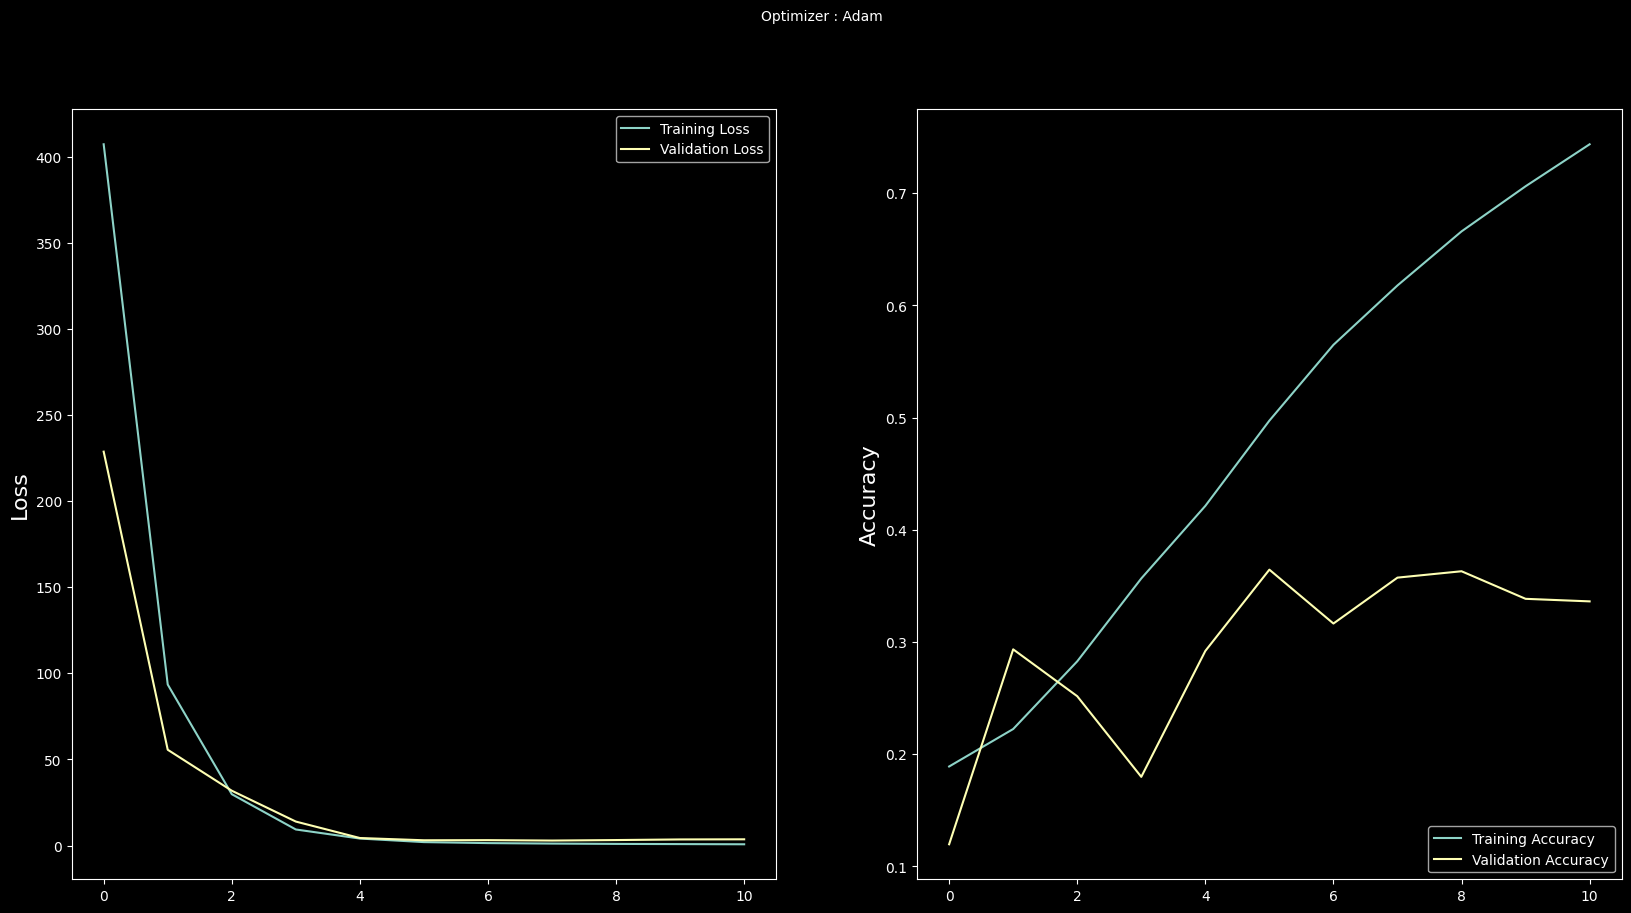

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()